In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml

In [2]:
import pandas as pd
import numpy as np

# Create initial scaling values
scaling_values = [0.1, 0.2, 0.3, 0.5, 1, 2, 4, 7, 12, 20]
sample_sizes = [1000, 10000, 100000, 1000000]

# Create an empty dataframe to store all combinations
rows = []

# Generate combinations of scaling, sample_size, and replicates
for size in sample_sizes:
    # Determine number of replicates based on sample size
    if size < 100000:
        num_reps = 10
    elif size == 100000:
        num_reps = 5
    else:  # size == 1000000
        num_reps = 1

    for scale in scaling_values:
        # Calculate n for each combination
        n_raw = (1 + np.sqrt(1 + 8 * scale * size)) / 2

        # Round to nearest integer
        n_rounded = round(n_raw)

        # Ensure the result is even
        n_even = n_rounded + (n_rounded % 2)

        # Add entries for each replicate
        for rep in range(1, num_reps + 1):
            rows.append({
                'sample_size': size,
                'scaling': scale,
                'n_raw': n_raw,
                'qtl_n': n_even,  # This is rounded to nearest even integer
                'rep': rep
            })

# Create the dataframe from the rows
df = pd.DataFrame(rows)

# Optional: format the dataframe for better display
df = df.sort_values(['sample_size', 'scaling', 'rep']).reset_index(drop=True)
df['cons'] = np.log(df['sample_size'])


In [3]:
df

,sample_size,scaling,n_raw,qtl_n,rep,cons
0,1000,0.1,14.650972,16,1,6.907755
1,1000,0.1,14.650972,16,2,6.907755
2,1000,0.1,14.650972,16,3,6.907755
3,1000,0.1,14.650972,16,4,6.907755
4,1000,0.1,14.650972,16,5,6.907755
...,...,...,...,...,...,...
255,1000000,2.0,2000.500062,2002,1,13.815511
256,1000000,4.0,2828.927169,2830,1,13.815511
257,1000000,7.0,3742.157420,3742,1,13.815511
258,1000000,12.0,4899.479511,4900,1,13.815511


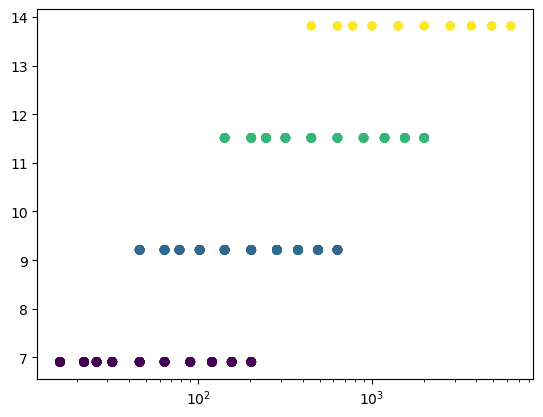

In [4]:
plt.scatter(df['qtl_n'], df['cons'], c=np.log(df['sample_size']))
plt.xscale('log')


In [5]:
config = {
    'parameter_sets': []
}

# Add each row from the dataframe as a parameter set
for _, row in df.iterrows():
    config['parameter_sets'].append({
        'sample_size': int(row['sample_size']),
        'scaling': float(row['scaling']),
        'qtl_n': int(row['qtl_n']),
        'rep': int(row['rep'])
    })


In [6]:
# Save to YAML file
with open('Snakemake_wildcard_config.yaml', 'w') as f:
    yaml.dump(config, f, default_flow_style=False)